## Performing a comparative gender analysis and generating word clouds from the lyrics of female and male rappers in Senegal.

### Step 1: Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import nltk
from matplotlib import font_manager

### Step 2: Define a function to load CSV from GitHub

In [2]:
def load_lyrics_from_github(raw_url):
    response = requests.get(raw_url).content
    return pd.read_csv(io.StringIO(response.decode('utf-8')))

### Step 3: Load lyrics data for female and male rappers

In [3]:
# Insert the actual RAW CSV URLs

female_csv_url = "https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Social%20Issues%20%26%20Human%20Rights/Lyrics%20of%20popular%20Senegal%20female%20rap%20songs%202024.csv"
male_csv_url = "https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Social%20Issues%20%26%20Human%20Rights/Lyrics%20of%20popular%20Senegal%20male%20rap%20songs%202024.csv"

female_df = load_lyrics_from_github(female_csv_url)
male_df = load_lyrics_from_github(male_csv_url)

### Step 4: Preview the structure

In [4]:
female_df.head(), male_df.head()

(  Lyrics of the most popular songs of Senegalese female rappers
 0  Sister Fa - Milyamba (English)\n\n1. Verse\nWe...           
 1  Sister LB - maa la dig tekki lyrics english I ...           
 2  ** The lyrics of Mamy Victory "Kouy Feugeuti" ...           ,
   Lyrics of the most popular songs of Senegalese male rappers
 0  Keur Gui - Alma Noop Lyrics\nCliff\nTanale, my...         
 1  Daara J Family - Déloussil Lyrics\n\nDeloussil...         
 2  Blinde Nema Waw Lyrics\n\nAlmost immediately, ...         
 3  The African ft. Baaba Maal - Didier Awadi\n\n....         
 4  I wonder, I wonder, I think\n\n(Straight from ...         )

### Step 5: Combine all lyrics into one string per group

In [5]:
female_text = female_df['Lyrics of the most popular songs of Senegalese female rappers'].dropna().str.cat(sep=' ')
male_text = male_df['Lyrics of the most popular songs of Senegalese male rappers'].dropna().str.cat(sep=' ')

# Clean female and male lyrics text
clean_female_text = " ".join(female_text.split())
clean_male_text = " ".join(male_text.split())

### Step 6: Create a function to generate a word cloud

In [6]:
# Download stopwords once
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

def generate_wordcloud(text, title):
    # Combine NLTK and WordCloud default stopwords
    all_stopwords = set(stopwords.words('english')).union(STOPWORDS)
    
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"  # Adjust if needed

    cleaned_text = " ".join(text.split())  # Clean extra whitespace

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=all_stopwords,
        font_path=font_path
    ).generate(cleaned_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

[nltk_data] Downloading package stopwords to /home/soila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 7: Generate word clouds for both groups

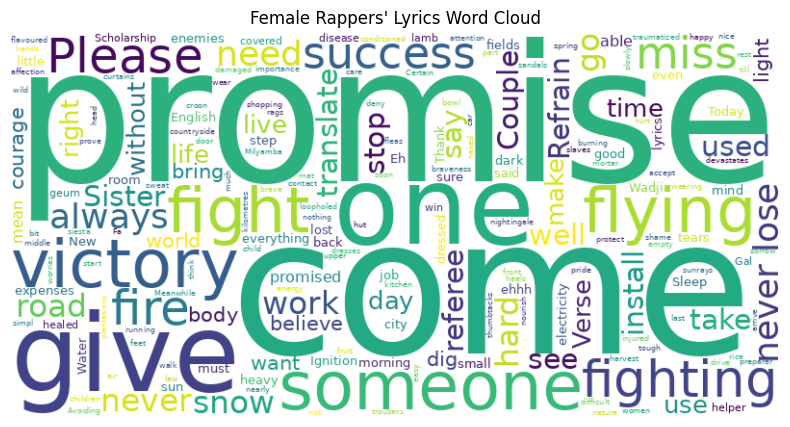

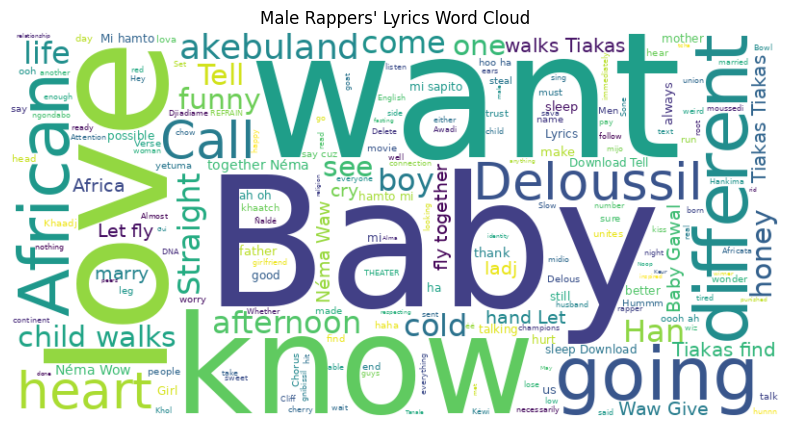

In [7]:
generate_wordcloud(female_text, "Female Rappers' Lyrics Word Cloud")
generate_wordcloud(male_text, "Male Rappers' Lyrics Word Cloud")

### Optional Step 8: Compare top 20 most common words (basic)

In [8]:
from collections import Counter
import re
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to get top N filtered words
def get_top_words(text, n=20):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return Counter(filtered_words).most_common(n)

# Get top 20 filtered words for both groups
female_top_words = get_top_words(female_text)
male_top_words = get_top_words(male_text)

# Print for raw verification (optional)
print("Top words in Female lyrics:")
print(female_top_words)

print("\nTop words in Male lyrics:")
print(male_top_words)

# Format into a side-by-side DataFrame
top_words_df = pd.DataFrame({
    'Female Rappers': [f"{word} ({count})" for word, count in female_top_words],
    'Male Rappers': [f"{word} ({count})" for word, count in male_top_words]
})

top_words_df.index = [f"{i+1}" for i in range(len(top_words_df))]
top_words_df

Top words in Female lyrics:
[('promise', 12), ('come', 12), ('give', 11), ('never', 11), ('one', 10), ('victory', 9), ('someone', 9), ('fight', 8), ('flying', 8), ('fighting', 8), ('please', 7), ('success', 6), ('miss', 6), ('lose', 6), ('always', 6), ('go', 5), ('work', 5), ('hard', 5), ('fire', 5), ('snow', 5)]

Top words in Male lyrics:
[('baby', 25), ('want', 17), ('like', 16), ('mi', 16), ('know', 14), ('love', 14), ('tiakas', 14), ('going', 12), ('let', 12), ('néma', 12), ('different', 12), ('tell', 11), ('african', 11), ('deloussil', 10), ('find', 10), ('heart', 10), ('akebuland', 10), ('sleep', 9), ('child', 9), ('call', 9)]


,Female Rappers,Male Rappers
1,promise (12),baby (25)
2,come (12),want (17)
3,give (11),like (16)
4,never (11),mi (16)
5,one (10),know (14)
6,victory (9),love (14)
7,someone (9),tiakas (14)
8,fight (8),going (12)
9,flying (8),let (12)
10,fighting (8),néma (12)
